## 

# T·∫£i t·∫≠p d·ªØ li·ªáu

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ƒê∆∞·ªùng d·∫´n dataset
DATASET_PATH = "alola"
TRAIN_PATH = os.path.join(DATASET_PATH, "train/train")  # D·ªØ li·ªáu hu·∫•n luy·ªán
TEST_PATH = os.path.join(DATASET_PATH, "test/test")  # D·ªØ li·ªáu ki·ªÉm tra

# Ki·ªÉm tra s·ªë l∆∞·ª£ng lo·∫°i tr√°i c√¢y
categories = os.listdir(TRAIN_PATH)
print(f"Dataset c√≥ {len(categories)} lo·∫°i tr√°i c√¢y.")


Dataset c√≥ 33 lo·∫°i tr√°i c√¢y.


# X·ª≠ l√Ω d·ªØ li·ªáu & TƒÉng c∆∞·ªùng

In [5]:
# K√≠ch th∆∞·ªõc ·∫£nh ƒë·∫ßu v√†o
IMG_SIZE = (100, 100)
BATCH_SIZE = 32

# T·∫°o Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chu·∫©n h√≥a ·∫£nh v·ªÅ 0-1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Chia 20% d·ªØ li·ªáu l√†m t·∫≠p validation
)

# Load d·ªØ li·ªáu t·ª´ th∆∞ m·ª•c train
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Ch·ªçn t·∫≠p train
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Ch·ªçn t·∫≠p validation
)

# S·ªë l∆∞·ª£ng l·ªõp (lo·∫°i tr√°i c√¢y)
num_classes = len(train_generator.class_indices)
print(f"S·ªë l·ªõp: {num_classes}")


Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.
S·ªë l·ªõp: 33


# X√¢y d·ª±ng m√¥ h√¨nh CNN
3 t·∫ßng Conv2D , MaxPooling2D v√† m·ªôt t·∫ßng Complete Connected ·ªü cu·ªëi.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# X√¢y d·ª±ng m√¥ h√¨nh CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Gi·∫£m overfitting
    Dense(num_classes, activation='softmax')  # L·ªõp ƒë·∫ßu ra
])

# Compile m√¥ h√¨nh
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Hi·ªÉn th·ªã ki·∫øn tr√∫c m√¥ h√¨nh
model.summary()


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_9 (Conv2D)               ‚îÇ (None, 98, 98, 32)     ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_9 (MaxPooling2D)  ‚îÇ (None, 49, 49, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_10 (Conv2D)              ‚îÇ (None, 47, 47, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_10 (MaxPooling2D) ‚îÇ (None, 23, 23, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_11 (Conv2D)              ‚îÇ (None, 21, 21, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_11 (MaxPooling2D) ‚îÇ (None, 10, 10, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_3 (Flatten)             ‚îÇ (None, 12800)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 512)            ‚îÇ     6,554,112 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 512)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 33)             ‚îÇ        16,929 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 6,664,289 (25.42 MB)

 Trainable params: 6,664,289 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

# Hu·∫•n luy·ªán m√¥ h√¨nh
S·ª≠ d·ª•ng Adam Optimizer v√† function loss categorical_crossentropy .

Ch·∫°y 10 k·ª∑ nguy√™n ƒë·ªÉ m√¥ h√¨nh h√≥a b√†i h·ªçc t·ª´ d·ªØ li·ªáu.

In [39]:
EPOCHS = 50  # S·ªë l·∫ßn l·∫∑p qua d·ªØ li·ªáu

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/50
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 140s 330ms/step - accuracy: 0.4203 - loss: 1.8829 - val_accuracy: 0.9003 - val_loss: 0.2680
Epoch 2/50
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 121s 287ms/step - accuracy: 0.8883 - loss: 0.3111 - val_accuracy: 0.9518 - val_loss: 0.1359
Epoch 3/50
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 124s 293ms/step - accuracy: 0.9303 - loss: 0.1968 - val_accuracy: 0.9747 - val_loss: 0.0640
Epoch 4/50
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 123s 291ms/step - accuracy: 0.9588 - loss: 0.1177 - val_accuracy: 0.9920 - val_loss: 0.0313
Epoch 5/50
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 122s 289ms/step - accuracy: 0.9751 - loss: 0.0764 - val_accuracy: 0.9714 - val_loss: 0.0701
Epoch 6/50
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133s 315ms/step - accuracy: 0.9627 - loss: 0.1186 - val_accu

# L∆∞u d·ªØ li·ªáu hu·∫•n luy·ªán

In [40]:
import json

with open("training_history.json", "w") as f:
    json.dump(history.history, f)

# V·∫Ω bi·ªÉu ƒë·ªì v·ªÅ ƒë·ªô ch√≠nh x√°c v√† ƒë·ªô m·∫•t ƒë·ªÉ ki·ªÉm tra hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh.

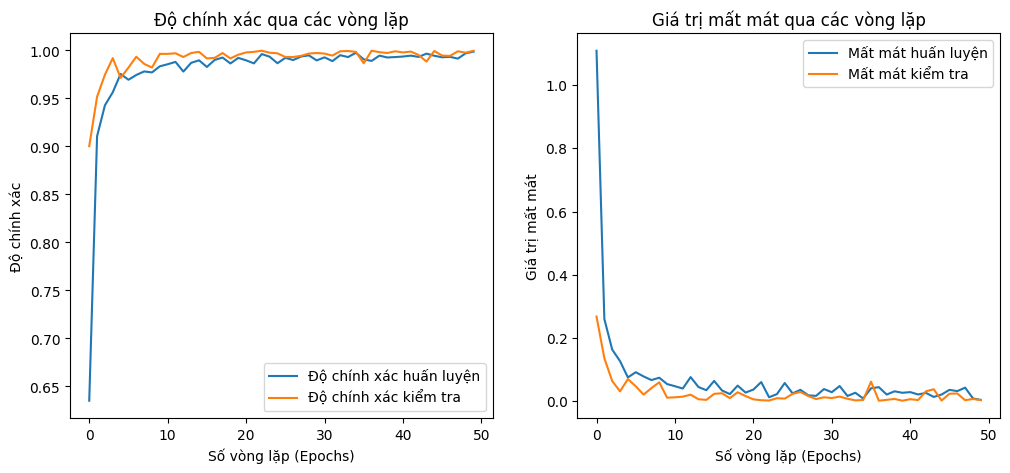

In [41]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# V·∫Ω bi·ªÉu ƒë·ªì ƒê·ªô ch√≠nh x√°c
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='ƒê·ªô ch√≠nh x√°c hu·∫•n luy·ªán')
plt.plot(history.history['val_accuracy'], label='ƒê·ªô ch√≠nh x√°c ki·ªÉm tra')
plt.xlabel('S·ªë v√≤ng l·∫∑p (Epochs)')
plt.ylabel('ƒê·ªô ch√≠nh x√°c')
plt.legend()
plt.title('ƒê·ªô ch√≠nh x√°c qua c√°c v√≤ng l·∫∑p')

# V·∫Ω bi·ªÉu ƒë·ªì M·∫•t m√°t
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='M·∫•t m√°t hu·∫•n luy·ªán')
plt.plot(history.history['val_loss'], label='M·∫•t m√°t ki·ªÉm tra')
plt.xlabel('S·ªë v√≤ng l·∫∑p (Epochs)')
plt.ylabel('Gi√° tr·ªã m·∫•t m√°t')
plt.legend()
plt.title('Gi√° tr·ªã m·∫•t m√°t qua c√°c v√≤ng l·∫∑p')

plt.show()


# G·ªçi d·ªØ li·ªáu hu·∫•n luy·ªán ƒë√£ ƒë∆∞·ª£c l∆∞u

In [42]:
with open("training_history.json", "r") as f:
    history_loaded = json.load(f) 

# D·ª± ƒëo√°n tr√™n ·∫£nh m·ªõi


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step


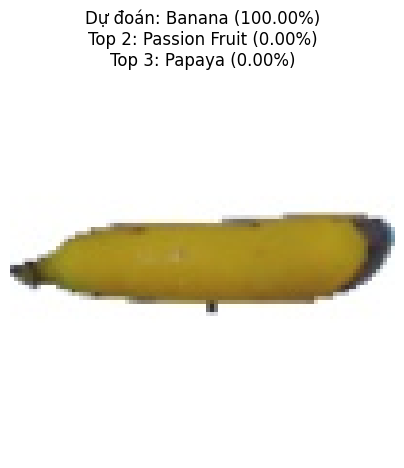

üîç K·∫øt qu·∫£ d·ª± ƒëo√°n:
1. Banana - X√°c su·∫•t: 100.00%
2. Passion Fruit - X√°c su·∫•t: 0.00%
3. Papaya - X√°c su·∫•t: 0.00%


In [44]:
import cv2
def predict_image(image_path, model, class_indices):
    # Ki·ªÉm tra ·∫£nh c√≥ t·ªìn t·∫°i kh√¥ng
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"L·ªói: Kh√¥ng th·ªÉ ƒë·ªçc ·∫£nh t·ª´ ƒë∆∞·ªùng d·∫´n {image_path}")
            return
    except Exception as e:
        print(f"L·ªói khi ƒë·ªçc ·∫£nh: {e}")
        return
    # Chuy·ªÉn BGR ‚Üí RGB ƒë·ªÉ hi·ªÉn th·ªã ƒë√∫ng m√†u
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    # Ki·ªÉm tra s·ªë k√™nh (tr√°nh ·∫£nh c√≥ k√™nh alpha)
    if img.shape[-1] == 4:  
        img = img[:, :, :3]  
    # Resize, chu·∫©n h√≥a ·∫£nh
    img = cv2.resize(img, (100, 100))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    # D·ª± ƒëo√°n
    prediction = model.predict(img)[0]  
    sorted_indices = np.argsort(prediction)[::-1]  # S·∫Øp x·∫øp theo x√°c su·∫•t gi·∫£m d·∫ßn
    # L·∫•y nh√£n t·ª´ class_indices
    class_labels = list(class_indices.keys())
    top3_labels = [class_labels[i] for i in sorted_indices[:3]]
    top3_probs = [prediction[i] * 100 for i in sorted_indices[:3]]  # Chuy·ªÉn sang %
    # Hi·ªÉn th·ªã ·∫£nh v√† k·∫øt qu·∫£ d·ª± ƒëo√°n
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.imread(image_path)[..., ::-1])  # ƒê·ªçc l·∫°i ·∫£nh cho hi·ªÉn th·ªã ƒë√∫ng
    plt.title(f"D·ª± ƒëo√°n: {top3_labels[0]} ({top3_probs[0]:.2f}%)\n"
              f"Top 2: {top3_labels[1]} ({top3_probs[1]:.2f}%)\n"
              f"Top 3: {top3_labels[2]} ({top3_probs[2]:.2f}%)",
              fontsize=12)
    plt.axis("off")
    plt.show()
    # In ra k·∫øt qu·∫£ chi ti·∫øt
    print("üîç K·∫øt qu·∫£ d·ª± ƒëo√°n:")
    for i in range(3):
        print(f"{i+1}. {top3_labels[i]} - X√°c su·∫•t: {top3_probs[i]:.2f}%")
    # C·∫£nh b√°o n·∫øu x√°c su·∫•t th·∫•p
    if top3_probs[0] < 50:
        print("C·∫£nh b√°o: M√¥ h√¨nh kh√¥ng ch·∫Øc ch·∫Øn v·ªÅ d·ª± ƒëo√°n n√†y!")
# Ki·ªÉm tra v·ªõi m·ªôt ·∫£nh test trong aloha/test/test
test_image = "alola/test/test/0888.jpg"
predict_image(test_image, model, train_generator.class_indices)


# L∆∞u v√† t·∫£i m√¥ h√¨nh

In [101]:
# L∆∞u m√¥ h√¨nh d∆∞·ªõi d·∫°ng .keras
model.save("fruit_classification_model.keras")

# Load l·∫°i m√¥ h√¨nh khi c·∫ßn s·ª≠ d·ª•ng
from tensorflow.keras.models import load_model

duong_dan_mo_hinh = "fruit_classification_model.keras"  # S·ª≠ d·ª•ng ƒë√∫ng ƒë·ªãnh d·∫°ng

# Ki·ªÉm tra xem t·ªáp c√≥ t·ªìn t·∫°i kh√¥ng tr∆∞·ªõc khi load
import os
if os.path.exists(duong_dan_mo_hinh):
    try:
        loaded_model = load_model(duong_dan_mo_hinh)
        print("‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c load th√†nh c√¥ng!")
    except Exception as e:
        print(f"L·ªói khi load m√¥ h√¨nh: {e}")
else:
    print(f"‚ö†Ô∏è L·ªói: Kh√¥ng t√¨m th·∫•y t·ªáp m√¥ h√¨nh t·∫°i '{duong_dan_mo_hinh}'. Vui l√≤ng ki·ªÉm tra l·∫°i ƒë∆∞·ªùng d·∫´n!")


‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c load th√†nh c√¥ng!


In [102]:
from tensorflow.keras.models import load_model

# Load m√¥ h√¨nh ƒë√£ l∆∞u
model = load_model("fruit_classification_model.keras")

# D·ª± ƒëo√°n tr√™n ·∫£nh m·ªõi
import numpy as np
img = np.random.rand(1, 100, 100, 3)  # ·∫¢nh gi·∫£ l·∫≠p (thay b·∫±ng ·∫£nh th·ª±c t·∫ø)
prediction = model.predict(img)
print("üîç K·∫øt qu·∫£ d·ª± ƒëo√°n:", prediction)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 106ms/step
üîç K·∫øt qu·∫£ d·ª± ƒëo√°n: [[3.8816347e-19 4.3551973e-24 1.6943531e-24 1.9810798e-25 5.2896020e-26
  8.5422673e-09 1.5551803e-26 8.0941414e-23 3.8445159e-18 1.0117538e-21
  2.7625445e-21 1.1244598e-21 4.0870921e-10 2.6459383e-31 2.2330808e-24
  3.2945577e-23 1.1391140e-19 6.9761269e-29 1.4600904e-22 3.8933678e-25
  1.1550815e-11 9.9489733e-24 5.4729313e-14 3.5054940e-19 1.4765979e-10
  7.9723527e-18 5.8341403e-08 3.9617944e-12 7.3592402e-22 1.0000000e+00
  1.0749654e-15 4.0818284e-20 1.0351514e-19]]


# T·ªâ l·ªá t·∫≠p Test v√† Train

In [ ]:
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn th∆∞ m·ª•c dataset
train_dir = "alola/train/train"  
test_dir = "alola/test/test"  

# ƒê·∫øm s·ªë l∆∞·ª£ng ·∫£nh trong t·ª´ng th∆∞ m·ª•c
num_train_images = sum([len(files) for _, _, files in os.walk(train_dir)])
num_test_images = sum([len(files) for _, _, files in os.walk(test_dir)])

# T√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm
total_images = num_train_images + num_test_images
train_ratio = (num_train_images / total_images) * 100
test_ratio = (num_test_images / total_images) * 100

print(f"üìÇ S·ªë ·∫£nh trong t·∫≠p Train: {num_train_images}")
print(f"üìÇ S·ªë ·∫£nh trong t·∫≠p Test: {num_test_images}")
print(f"üìä T·ª∑ l·ªá Train: {train_ratio:.2f}%")
print(f"üìä T·ª∑ l·ªá Test: {test_ratio:.2f}%")


üìÇ S·ªë ·∫£nh trong t·∫≠p Train: 16854
üìÇ S·ªë ·∫£nh trong t·∫≠p Test: 5641
üìä T·ª∑ l·ªá Train: 74.92%
üìä T·ª∑ l·ªá Test: 25.08%


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step


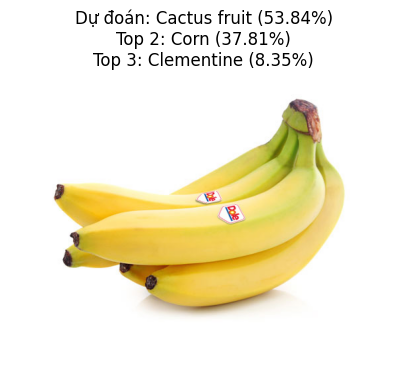

üîç K·∫øt qu·∫£ d·ª± ƒëo√°n:
1. Cactus fruit - X√°c su·∫•t: 53.84%
2. Corn - X√°c su·∫•t: 37.81%
3. Clementine - X√°c su·∫•t: 8.35%


In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"‚ùå Kh√¥ng th·ªÉ ƒë·ªçc ·∫£nh: {image_path}")
        return None

    # Chuy·ªÉn v·ªÅ kh√¥ng gian m√†u RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ƒêi·ªÅu ch·ªânh ƒë·ªô s√°ng
    img = cv2.convertScaleAbs(img, alpha=1.2, beta=10)

    # Chu·∫©n h√≥a histogram (c√¢n b·∫±ng √°nh s√°ng)
    for i in range(3):  
        img[:, :, i] = cv2.equalizeHist(img[:, :, i])

    # Resize v·ªÅ k√≠ch th∆∞·ªõc chu·∫©n
    img = cv2.resize(img, (100, 100)) / 255.0  # Chu·∫©n h√≥a v·ªÅ 0-1
    img = np.expand_dims(img, axis=0)  # Th√™m batch dimension
    return img

def predict_custom_image(image_path, model, class_indices):
    img = preprocess_image(image_path)
    if img is None:
        return

    # D·ª± ƒëo√°n
    prediction = model.predict(img)[0]
    sorted_indices = np.argsort(prediction)[::-1]

    # L·∫•y nh√£n v√† x√°c su·∫•t
    class_labels = list(class_indices.keys())
    top_labels = [class_labels[i] for i in sorted_indices[:3]]
    top_probs = [prediction[i] * 100 for i in sorted_indices[:3]]

    # Hi·ªÉn th·ªã k·∫øt qu·∫£
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.imread(image_path)[..., ::-1])  
    plt.title(f"D·ª± ƒëo√°n: {top_labels[0]} ({top_probs[0]:.2f}%)\n"
              f"Top 2: {top_labels[1]} ({top_probs[1]:.2f}%)\n"
              f"Top 3: {top_labels[2]} ({top_probs[2]:.2f}%)",
              fontsize=12)
    plt.axis("off")
    plt.show()

    # In k·∫øt qu·∫£ ra console
    print("üîç K·∫øt qu·∫£ d·ª± ƒëo√°n:")
    for i in range(3):
        print(f"{i+1}. {top_labels[i]} - X√°c su·∫•t: {top_probs[i]:.2f}%")

    # C·∫£nh b√°o n·∫øu x√°c su·∫•t th·∫•p
    if top_probs[0] < 50:
        print("‚ö†Ô∏è C·∫£nh b√°o: M√¥ h√¨nh kh√¥ng ch·∫Øc ch·∫Øn v·ªÅ d·ª± ƒëo√°n n√†y!")

# D·ª± ƒëo√°n v·ªõi ·∫£nh t·∫£i t·ª´ Google
custom_image = "google_images/banana.jpg"  
predict_custom_image(custom_image, model, train_generator.class_indices)
